## Playing with distributions

**All of this "hands-on" is about two-dimensional functions.**

The basic distribution is a bi-maxwellian. We can do essentially 2 operations :

* add a maxwellian to a set of other maxwellians
* truncate a population that is removing a piece of its tail

The object which manipulates a distribution is `operationOnDistribution`

In [1]:
import numpy as np
import operationOnDistribution

Without any args, the constructor builds an empty object. Then, you can add a single maxwellian with default values of its parameters. With the `show` method, you can see the associated parameters of this set

In [2]:
myPop = operationOnDistribution.Populations()

In [3]:
myPop.add()

In [9]:
myPop.show()

Population Id    1
Density          1.0
Bulk velocity    [0.0, 0.0]
Thermal velocity [0.5, 0.5]
Support          [[-inf, inf], [-inf, inf]]


### Display

Then, you can display this set of maxwellians (at this stage, containing only a single one), but before, you need to build the associated function using the method `computeDIstrib`. This step is mandatory before the `display` method, but more generally whenever the list of individual maxwellian distributions is modified.

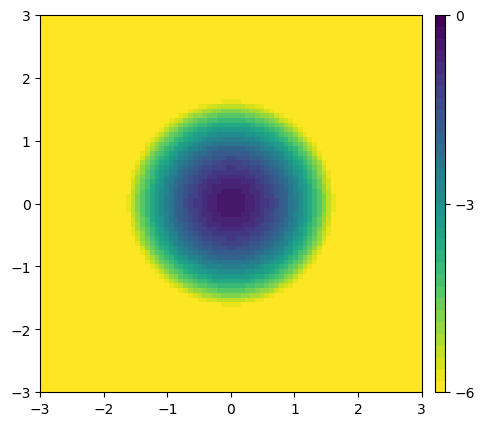

In [10]:
myPop.computeDistrib()
myPop.display()

There is also a method, called `cut`, that allows to (individually or collectively) modify the support of these maxwellians. The needed arg is a list of supports (lower and upper bounds) in the first and second direction, respectively.

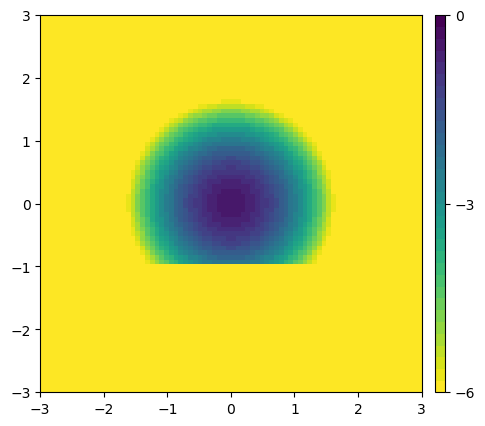

In [11]:
myPop.cut(support=[[-np.inf, +np.inf], [-1, +np.inf]])
myPop.computeDistrib()
myPop.display()

Because the distribution function has been updated, we can locally calculate the value of this distribution for a given value of the velocity (the two components)

In [12]:
myPop.distrib(0,0)

0.6366197723675814

### Calculation of the moments

Then, we have 4 methods to calculate the first 4 moments :
* `density` returns the total scalar density
* `bulk` returns a list containing the two components of the vectorial velocity : *V_0* and *V_1*
* `pressure` returns a list with the 3 independant components of the full pressure tensor : *P_00*, *P_01* = *P_10* and *P_11*
* `heatFlux` returns a list with the 4 independants components of the full heat flux : *q_000*, *q_001* = *q_010* = *q_100*, *q_011* = *q_101* = *q_110* and *q_111*

So for our distribution, the support is decreased... meaning that the integral to calculate the density will be smaller. In the same way, there is a bulk velocity that will appear because this cut distribution is no more symetric. As we removed the negative part of $v_1$, then $V_0$ is still 0, and $V_1$ will get slightly positive...

In [13]:
n=myPop.density()

density (moment of order 0) : 0.9772


In [14]:
w=myPop.bulk()

bulk[0] (moment of order 1) : 0.0000
bulk[1] (moment of order 1) : 0.0276


### Question :

Try to guess what should look like the 3 components of the full pressure tensor

In [15]:
p=myPop.pressure()

pressure [0][0] (moment of order 2) : 0.2443
pressure [0][1] (moment of order 2) : 0.0000
pressure [1][1] (moment of order 2) : 0.2166


### Question :

So the off-diagonal component of the full pressure tensor is null... despite the unsymmetric support. Could we create such an off-diagonal component with ann additional `cut` ? Yes, but which one ?

Now lets go back to the "original" distribution...

In [18]:
myPop = operationOnDistribution.Populations()
myPop.add()
myPop.cut(support=[[-np.inf, +np.inf], [-1, +np.inf]])
myPop.computeDistrib()

### Question :

Try to guess what should look like the 4 components of the full heat flux tensor

In [19]:
q=myPop.heatFlux()

heat flux [0][0][0] (moment of order 3) : 0.0000
heat flux [0][0][1] (moment of order 3) : -0.0000
heat flux [0][1][1] (moment of order 3) : 0.0000
heat flux [1][1][1] (moment of order 3) : 0.0225


### With a second population

Now, we consider the case of two cold maxwellians drifting one relative to the other. In this case, "cold" means that the thermal velocity o the distribution is small compared to the bulk velocity.

Population Id    1
Density          1
Bulk velocity    [-1.5, 0]
Thermal velocity [0.3, 0.3]
Support          [[-inf, inf], [-inf, inf]]
Population Id    2
Density          1
Bulk velocity    [1.5, 0]
Thermal velocity [0.3, 0.3]
Support          [[-inf, inf], [-inf, inf]]


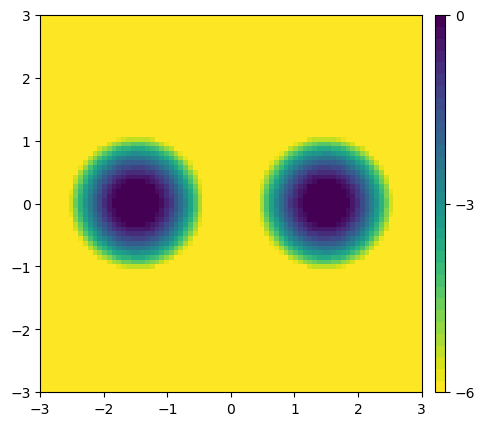

In [20]:
myPop = operationOnDistribution.Populations()
myPop.add(n=1, bulk=[-1.5, 0], vth=[0.3, 0.3])
myPop.add(n=1, bulk=[+1.5, 0], vth=[0.3, 0.3])
myPop.show()
myPop.computeDistrib()
myPop.display()

### Question :

Can you try to guess what are going to be the density, bulk velocity, full pressure and heat flux of such compound distribution ?

### The "Zorro" problem

Day 4 of the formation, you have to manage a peculiar distribution in the kinetic case essentially resulting from the superposition of 3 cold distribution with a significant relative drift velocity. You can rebuild such a "3-populations" distribution, and then calculate the associated moments.

### Question :

In this case, what could be an adapted closure equation... that means, how the heatflux, pressure, bulk velocity and density could be related ? You can play with the numerical solution, but also do it in an analytical way...